<a href="https://colab.research.google.com/github/krupalidobariya/Percentage_Predictor/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BY: KRUPALI DOBARIYA
#The Sparks Foundation
#DATA SCIENCE AND BUSSINESS ANALYTICS intern 
#TASK #1 : Prediction using Supervised ML
Problem Statment : What will be predicted score if a student studies for 9.25     hrs/ day?                                                        
Data link: http://bit.ly/w-data                                           
-In this problem, I found that score  only dependents on hours per day studies. So, for prediction, I used simple linear regression algorithm.

In [ ]:
# Importing all libraries required in this Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
print('Import libraries done!!')

Import libraries done!!


In [ ]:
#Importing data from link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported!!")

Data imported!!


# Data Analysis

In [ ]:
#reading data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#it gives the information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#it shows min,max count,mean of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#print first 5 line of data  
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#print last 3 lines of data
data.tail(3)

,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.shape #row and coloumns number in data

(25, 2)

In [ ]:
#check how many value is null in rows 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Correlation value is nearly equal to 1.So there is a positive relation between Hours and Scores.

There is no null value in dataset. so no need to clean the data.

#Data Visualization

<Figure size 1440x360 with 0 Axes>

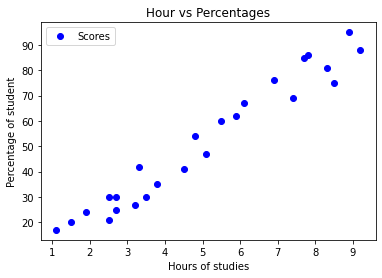

In [ ]:
#Visualization using matplotlib
fig = plt.figure(figsize = (20, 5))
x='Hours'
y="Scores"
data.plot(x,y,style='o',c='b',marker ="o")
plt.xlabel('Hours of studies')
plt.ylabel('Percentage of student')
plt.title('Hour vs Percentages')
plt.show()

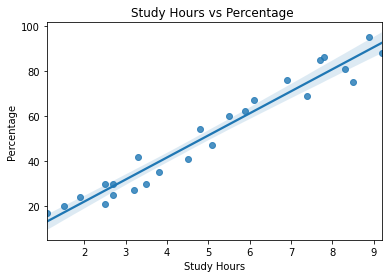

In [ ]:
#Visualization using seaborn
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Study Hours vs Percentage ')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

# Preparing the data for Predictions!!

In [ ]:
X=data.iloc[:, :-1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
Y=data.iloc[ :,1].values
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#Split the data into Train & Test and Creating a model using Simple Linear Regression algorithm

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X , Y , test_size= 0.2,    
                                                    random_state=0)             

In [ ]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train)
print(" model successfully trained!!")

 model successfully trained!!


Eqution of Y=mX+c                                                         
           Y=output                                                       
           X=Input                                                        
           m=Slop of line                                                 
           c=intercept

In [ ]:
#Find Rregression line values
Line = regressor.coef_ * X + regressor.intercept_
print(Line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


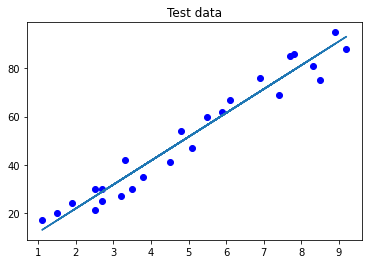

In [ ]:
#Plotting for the test data
plt.scatter(X,Y,color='blue')
plt.plot(X,Line)
plt.title('Test data')
plt.show()

# Prediction of Percentage

In [ ]:
print('x_test',X_test)
print('y_test',y_test)

x_test [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_test [20 27 69 30 62]


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing actual vs predicted data**

In [ ]:
Compare = pd.DataFrame({'Actual': y_test ,'Predicted' : y_pred})
Compare.head(3)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018


# Find Accuracy of model

In [ ]:
from sklearn import metrics
ms=metrics.mean_squared_error(y_test,y_pred)
print('mean squared error:',ms)
Absolute=metrics.mean_absolute_error(y_test,y_pred)
print('mean Absolute error:',Absolute)
rms=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',rms)
r_2=metrics.r2_score(y_test,y_pred)
print('R_2 :',r_2)

mean squared error: 21.598769307217456
mean Absolute error: 4.183859899002982
root mean squared error: 4.647447612100373
R_2 : 0.9454906892105354



Absolute error shows how actual average result is far away from predicted 
result                                                                       

R-2 gives the score of model fitting and in our case it is 0.9454. so it 
is good result for our model.


# predicted score if a student studies for 9.25 hrs/ day

In [ ]:
Hours = 9.25
Prediction = regressor.predict([[Hours]])
print('No. of Hours :',Hours)
print('Predicted Score :',Prediction[0])

No. of Hours : 9.25
Predicted Score : 93.69173248737539


**So, if student will study for 9.25 hrs/day then predicted percentage will be  93.69173248737539**

